In [8]:
# title = "autoencoder for MNIST dataset"    
# author = "Cindy Pino-Barrios"
# date = "03-22-2023"
# description = "Train a 64x16x64 autoencoder on the [digits](https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset) dataset. \n
#                   All of the following work should be done in a Jupyter Notebook."

In [16]:
# Import the necessary packages and modules 

from nn.nn import NeuralNetwork
from nn.preprocess import sample_seqs
from nn.preprocess import one_hot_encode_seqs
from nn.io import read_text_file, read_fasta_file

In [17]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


# Autoencoder for Digit Data

Objective 
------
        Trained a 64x16x64 autoencoder on the digit dataset 

Procedure
------

-  Load the digits dataset through sklearn using <code><a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html">sklearn.datasets.load_digits()</a></code>.
-  Split the data into training and validation sets.
-  Generate an instance of your `NeuralNetwork` class with a 64x16x64 autoencoder architecture.
-  Train your autoencoder on the training data.
-  Plot your training and validation loss by epoch.
-  Quantify your average reconstruction error over the validation set.
-  Explain why you chose the hyperparameter values you did.

In [18]:
# Load the digit dataset, normalize the data, and split the data into training and testing sets

digits = load_digits()  # Load the digits dataset
X, y = digits.data, digits.target  # X is the data, y is the target

X = X/16  # Normalize the data

# Split the data into training and testing sets (use 20% of the data for testing) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Create a for loop to determine which parameters to use for the NeuralNetwork class instance to get the lowest loss on the validation set 

## Parameters:
seed = 42
nn_arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},{ 'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}]


lr = [0.001, 0.01, 0.1, 1]
epochs = [5, 10, 100, 200, 300, 400, 500]
batch_size = [5, 32, 64, 128, 256, 512]
loss = 'mse'

## Create a for loop to determine which parameters to use for the NeuralNetwork class instance to get the lowest loss on the validation set
hyperparameters = []
for l in lr:
    for epoch in epochs:
        for bs in batch_size:
            autoencoder = NeuralNetwork(nn_arch=nn_arch, lr=l, seed=seed, batch_size=bs, epochs=epoch, loss_function=loss)
            _ , loss_test = autoencoder.fit(X_train, X_train, X_val, X_val)
            hyperparameters.append([l, epoch, bs, loss_test])
            # create a df of the hyperparameters and the loss
            df_hyperparameters = pd.DataFrame(hyperparameters, columns=['learning rate', 'epochs', 'batch_size', 'loss_test'])
            # sort the df by the loss by lowest loss first
            df_hyperparameters = df_hyperparameters.sort_values(by='loss_test')
            # select the optimal hyperparameters from the df
            optimal = df_hyperparameters.iloc[0]



# creating a print statement to print the optimal hyperparameters of learning rate, epochs, batch_size, and the minimal loss value

print(f'The optimal hyperparameters are: learning rate = {optimal[0]}, epochs = {optimal[1]}, batch_size = {optimal[2]}')
print('the optimal hyperparameters provide the lowest loss value on the validation set based on the iterations of the for loop')



The optimal hyperparameters are: learning rate = 0.1, epochs = 5, batch_size = 5


In [19]:
# Train the autoencoder with the optimal hyperparameters 

autoencoder = NeuralNetwork(nn_arch=nn_arch, lr=optimal[0], seed=seed, batch_size = optimal[2], epochs = optimal[1], loss_function=loss)

In [20]:
# Train the autoencoder
train_loss, val_loss = autoencoder.fit(X_train, X_train, X_val, X_val)

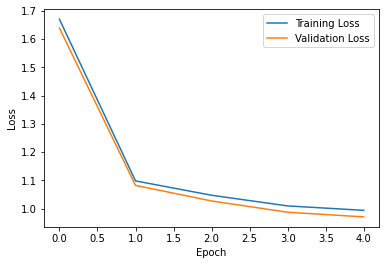

In [21]:
# Plot training and validation loss by epoch

# Plot training and validation loss by epoch
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [22]:
# print the average reconstruction error over the validation set
print(f'Average Training Error: {np.mean(train_loss)}')
print(f'Average Validation Error: {np.mean(val_loss)}')


Average Training Error: 1.1641524027095567
Average Validation Error: 1.1415768630209737
